In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
data = pd.read_excel("/content/drive/MyDrive/customer_churn_large_dataset.xlsx")


In [5]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [7]:
data.shape

(100000, 9)

In [8]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


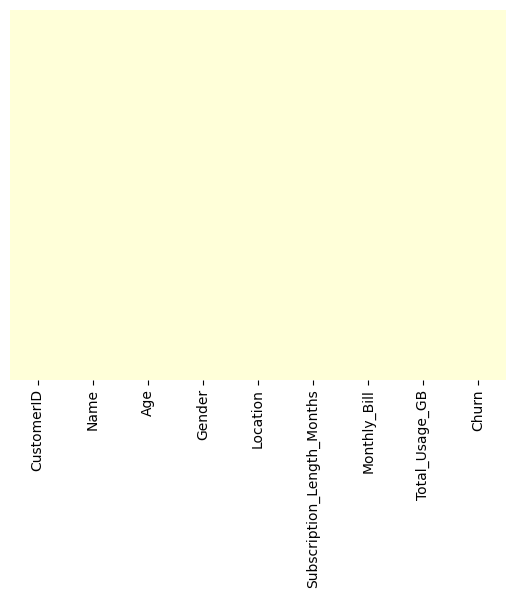

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='YlGnBu')

print(data.isnull().sum())

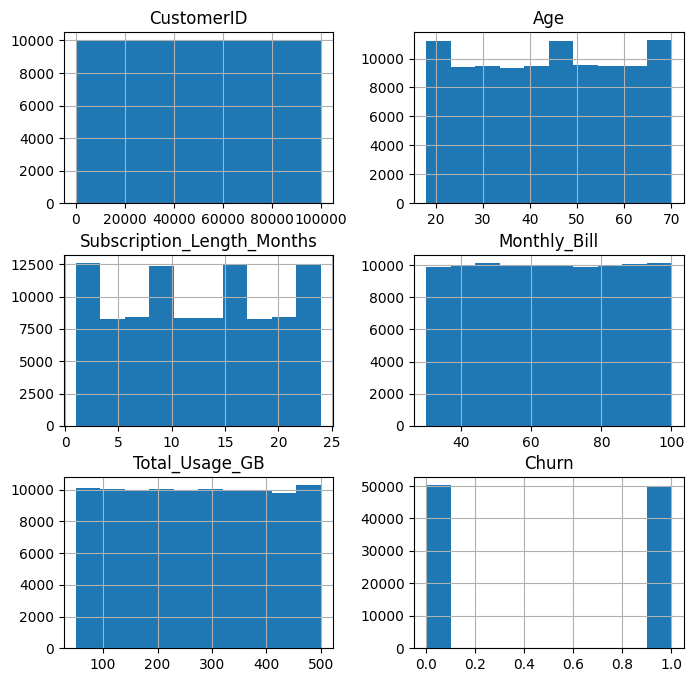

In [10]:
data.hist(figsize=(8,8))
plt.show()

In [12]:
print(len(pd.unique(data['Location'])))

5


In [13]:
locations = []
for loc in data['Location']:
    if loc not in locations:
        locations.append(loc)
print(locations)

['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston']


In [14]:
data.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [15]:
data = data.drop(columns=['CustomerID', 'Name'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [17]:
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [18]:
## Location = Los Angeles

churned_LA = data.Churn[(data.Location == 'Los Angeles') & (data.Churn == 1)].count()
count_LA = data.Churn[data.Location == 'Los Angeles'].count()
print("Percent of People Who Churned from Los Angeles --->", churned_LA*100/count_LA,'%')

## Location = New York

churned_NY = data.Churn[(data.Location == 'New York') & (data.Churn == 1)].count()
count_NY = data.Churn[data.Location == 'New York'].count()
print("Percent of People Who Churned from New York --->", churned_NY*100/count_NY,'%')

## Location = Miami

churned_Mi = data.Churn[(data.Location == 'Miami') & (data.Churn == 1)].count()
count_Mi = data.Churn[data.Location == 'Miami'].count()
print("Percent of People Who Churned from Miami --->", churned_Mi*100/count_Mi,'%')

## Location = Chicago

churned_Chi = data.Churn[(data.Location == 'Chicago') & (data.Churn == 1)].count()
count_Chi = data.Churn[data.Location == 'Chicago'].count()
print("Percent of People Who Churned from Chicago --->", churned_Chi*100/count_Chi,'%')

## Location = Houston

churned_H = data.Churn[(data.Location == 'Houston') & (data.Churn == 1)].count()
count_H = data.Churn[data.Location == 'Houston'].count()
print("Percent of People Who Churned from Houston --->", churned_H*100/count_H,'%')

Percent of People Who Churned from Los Angeles ---> 49.2989371787835 %
Percent of People Who Churned from New York ---> 50.36592136476051 %
Percent of People Who Churned from Miami ---> 50.30203185063152 %
Percent of People Who Churned from Chicago ---> 49.829642248722315 %
Percent of People Who Churned from Houston ---> 49.10949049957831 %


In [19]:
## Gender = Male

churned_m = data.Churn[(data.Gender == 'Male') & (data.Churn == 1)].count()
count_m = data.Churn[data.Gender == 'Male'].count()
print("Percent of Males Who Churned --->", churned_m*100/count_m,'%')


## Gender = Female

churned_f = data.Churn[(data.Gender == 'Female') & (data.Churn == 1)].count()
count_f = data.Churn[data.Gender == 'Female'].count()
print("Percent of Females Who Churned --->", churned_f*100/count_f,'%')

Percent of Males Who Churned ---> 49.88550538325566 %
Percent of Females Who Churned ---> 49.67341086506293 %


In [20]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [21]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['Location'] = LabelEncoder().fit_transform(data['Location'])

In [22]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  int64  
 2   Location                    100000 non-null  int64  
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 5.3 MB


<Axes: >

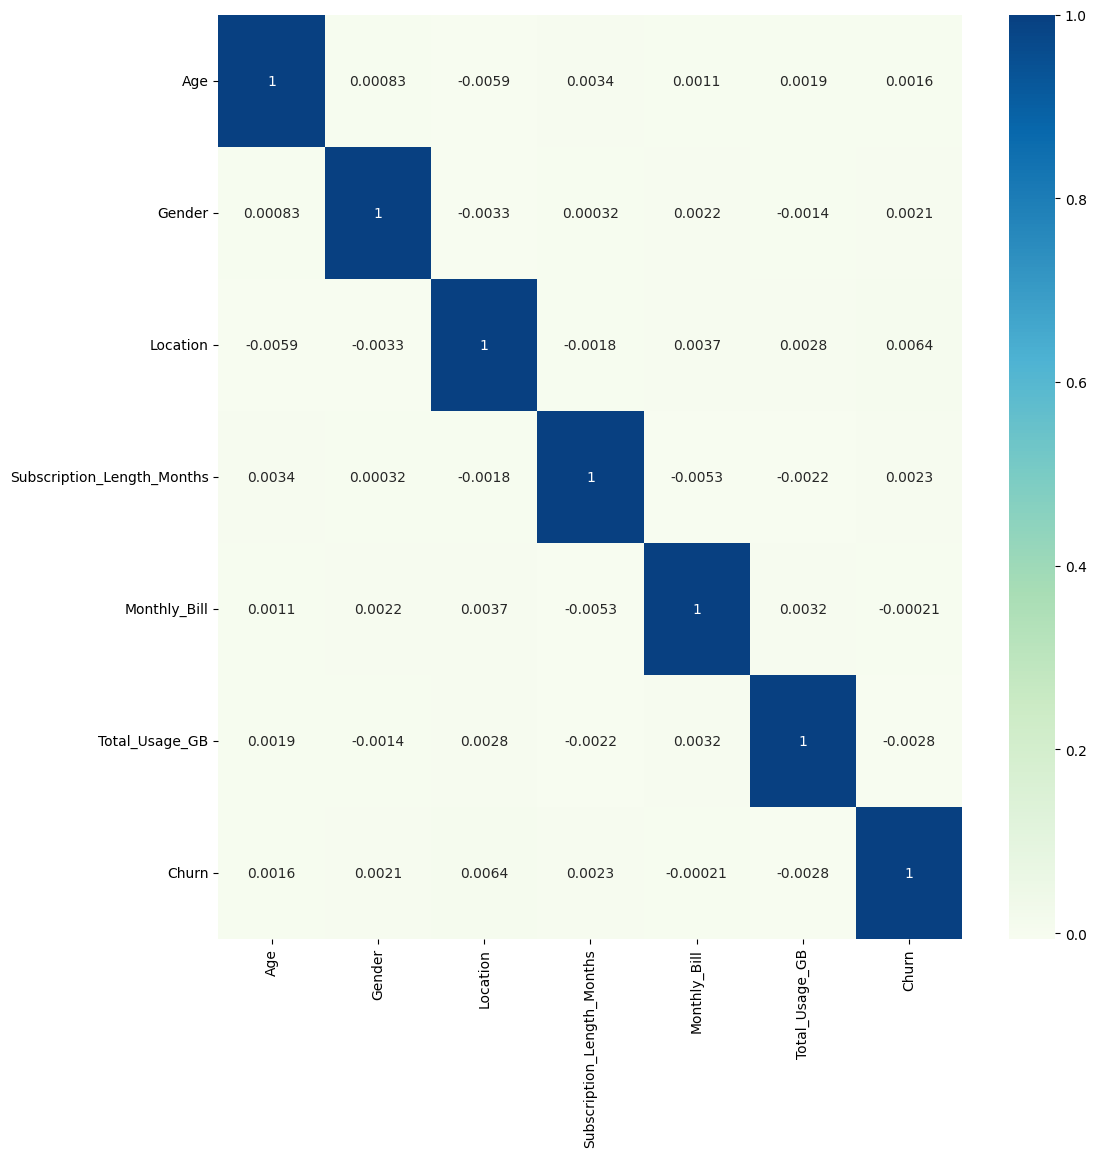

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(data=data.corr(), annot=True,cmap = "GnBu")

In [26]:
data.shape

(100000, 7)

In [27]:
data_encoded = data.sample(frac=1, random_state=42)

In [28]:
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']




from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score


#test size 20% and train size 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [29]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 49.94 %


In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 50.129999999999995 %


In [31]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 49.830000000000005 %


In [32]:
X_train.shape[1]

6

In [33]:
import tensorflow as tf
from tensorflow import keras

# Custom accuracy metric
def custom_accuracy(y_true, y_pred):
    y_pred_binary = tf.round(y_pred)
    return tf.keras.metrics.binary_accuracy(y_true, y_pred_binary)

# Custom precision metric
def custom_precision(y_true, y_pred):
    y_pred_binary = tf.round(y_pred)
    true_positives = tf.math.reduce_sum(y_true * y_pred_binary)
    predicted_positives = tf.math.reduce_sum(y_pred_binary)
    return true_positives / (predicted_positives + tf.keras.backend.epsilon())

# Custom recall metric
def custom_recall(y_true, y_pred):
    y_pred_binary = tf.round(y_pred)
    true_positives = tf.math.reduce_sum(y_true * y_pred_binary)
    actual_positives = tf.math.reduce_sum(y_true)
    return true_positives / (actual_positives + tf.keras.backend.epsilon())

# Custom F1-score metric
def custom_f1(y_true, y_pred):
    precision = custom_precision(y_true, y_pred)
    recall = custom_recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

In [34]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')      # Output layer with 1 neuron and sigmoid activation
])



learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)


# Compile the model
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[custom_accuracy, custom_precision, custom_recall, custom_f1])
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])




# Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Predict churn on the test data
y_pred = model.predict(X_test)

Epoch 1/10
2250/2250 [==============================] - 5s 2ms/step - loss: 2.3989 - accuracy: 0.5017 - val_loss: 1.1043 - val_accuracy: 0.5065
Epoch 2/10
2250/2250 [==============================] - 7s 3ms/step - loss: 0.9602 - accuracy: 0.5002 - val_loss: 0.8566 - val_accuracy: 0.5094
Epoch 3/10
2250/2250 [==============================] - 7s 3ms/step - loss: 0.7986 - accuracy: 0.5012 - val_loss: 0.7434 - val_accuracy: 0.5045
Epoch 4/10
2250/2250 [==============================] - 10s 4ms/step - loss: 0.7179 - accuracy: 0.5031 - val_loss: 0.7043 - val_accuracy: 0.5013
Epoch 5/10
2250/2250 [==============================] - 9s 4ms/step - loss: 0.7019 - accuracy: 0.5006 - val_loss: 0.6995 - val_accuracy: 0.5075
Epoch 6/10
2250/2250 [==============================] - 5s 2ms/step - loss: 0.6985 - accuracy: 0.5015 - val_loss: 0.6958 - val_accuracy: 0.5074
Epoch 7/10
2250/2250 [==============================] - 4s 2ms/step - loss: 0.6973 - accuracy: 0.5027 - val_loss: 0.6960 - val_accuracy

In [35]:
accuracy = accuracy_score(np.asarray(y_test, dtype = int), np.asarray(y_pred, dtype = int))
print("Accuracy Score:", accuracy * 100, "%")

Accuracy Score: 49.864999999999995 %


In [36]:
import pickle

In [37]:
pickle.dump(model,open('/content/model_saved','wb'))


In [38]:
model_loaded = pickle.load(open('/content/model_saved','rb'))

In [48]:
Age = 63
Gender = 1
Location = 2
Subscription_Length_Months = 17
Monthly_Bill = 73.37
Total_Usage_GB = 236

prediction = model_loaded.predict([[Age, Gender, Location, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB]])

1/1 [==============================] - 0s 109ms/step


In [49]:
int(prediction[0][0])

0

In [50]:
if prediction[0][0] >= 0.5:
    result = 1
else:
    result = 0
result

0